<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/TheThematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [1]:
import geopandas as gpd

linkGit='https://github.com/lcampos2111/Tarea-1/raw/refs/heads/main/'
linkWorldMaps='worldMaps.gpkg'

we can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [2]:
gpd.list_layers(linkGit+linkWorldMaps)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [3]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')

# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [4]:
import pandas as pd

someDataLink='Telephones_mobile.csv'
someData=pd.read_csv(linkGit+someDataLink)

## data available
someData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 225 non-null    object
 1   slug                 225 non-null    object
 2   value                225 non-null    int64 
 3   date_of_information  225 non-null    int64 
 4   ranking              225 non-null    int64 
 5   region               225 non-null    object
dtypes: int64(3), object(3)
memory usage: 10.7+ KB


## Pre Processing: Merging

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [5]:
someData.head()

,name,slug,value,date_of_information,ranking,region
0,China,china,1810000000,2023,1,East and Southeast Asia
1,India,india,1140000000,2022,2,South Asia
2,United States,united-states,386000000,2023,3,North America
3,Indonesia,indonesia,352000000,2023,4,East and Southeast Asia
4,Russia,russia,245000000,2022,5,Central Asia


Preparing thematic maps requires **social data** _about_ the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

### Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [6]:
countries.COUNTRY.head()

,COUNTRY
0,Aruba (Netherlands)
1,Antigua and Barbuda
2,Afghanistan
3,Algeria
4,Azerbaijan


In [7]:
someData.name.head()

,name
0,China
1,India
2,United States
3,Indonesia
4,Russia


Let's solve the _country name_ differences for the KEYs:




In [8]:
someData.rename(columns={'name':'Country'},inplace=True)

In [9]:
countries.rename(columns={'COUNTRY':'Country'},inplace=True)

It is very unlikely the names are written the same. Let's verify:

In [10]:
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

Check here:

In [11]:
onlyDF # they did not find a match in the MAP GDF!

{'American Samoa',
 'Anguilla',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'British Virgin Islands',
 'Burma',
 'Cabo Verde',
 'Cayman Islands',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Cook Islands',
 "Cote d'Ivoire",
 'Curacao',
 'Czechia',
 'Eswatini',
 'Falkland Islands (Islas Malvinas)',
 'Faroe Islands',
 'French Polynesia',
 'Gambia, The',
 'Gaza Strip',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Guernsey',
 'Hong Kong',
 'Jersey',
 'Korea, North',
 'Korea, South',
 'Kosovo',
 'Macau',
 'Micronesia, Federated States of',
 'Montserrat',
 'New Caledonia',
 'North Macedonia',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'Saint Helena, Ascension, and Tristan da Cunha',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sint Maarten',
 'Timor-Leste',
 'Turkey (Turkiye)',
 'Turks and Caicos Islands',
 'Virgin Islands',
 'Wallis and Futuna',
 'West Bank'}

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz** (based on the [Levenshtein algorithm](https://en.wikipedia.org/wiki/Levenshtein_distance)):

In [158]:
!pip install thefuzz

This is the basic idea:

In [12]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('BAHAMAS (THE)',onlyGDF)

('Bahamas', 90)

As you see, you get a coefficient value of 90 (the closer to 100 the better). That may be a reliable result.

Let's do the same for all the unmatched countries:

In [13]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(country, best(country,onlyGDF)) for country in onlyDF]

[('Hong Kong', ('Congo', 68)),
 ('Bahamas, The', ('Bahamas', 90)),
 ('Guam', ('Guam (US)', 90)),
 ('French Polynesia', ('French Polynesia (France)', 90)),
 ('Falkland Islands (Islas Malvinas)', ('Pitcairn Islands (UK)', 86)),
 ('Saint Martin', ('Antarctica', 64)),
 ('Saint Vincent and the Grenadines', ('St. Vincent and the Grenadines', 94)),
 ('Jersey', ('Jersey (UK)', 90)),
 ('Anguilla', ('Anguilla (UK)', 90)),
 ('Congo, Democratic Republic of the',
  ('Democratic Republic of the Congo', 95)),
 ('Gibraltar', ('Gibraltar (UK)', 95)),
 ('Puerto Rico', ('Puerto Rico (US)', 95)),
 ('Micronesia, Federated States of', ('Federated States of Micronesia', 95)),
 ('Northern Mariana Islands', ('Northern Mariana Islands (US)', 95)),
 ('Kosovo', ('Glorioso Islands (France)', 45)),
 ('Korea, North', ('North Korea', 95)),
 ('Curacao', ('Curacao (Netherlands)', 90)),
 ('Cayman Islands', ('Cayman Islands (UK)', 95)),
 ('West Bank', ('Western Sahara', 57)),
 ('Czechia', ('Czech Republic', 75)),
 ('Gaza

Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [14]:
#or
[(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]

[('Hong Kong', 'Congo', 68),
 ('Bahamas, The', 'Bahamas', 90),
 ('Guam', 'Guam (US)', 90),
 ('French Polynesia', 'French Polynesia (France)', 90),
 ('Falkland Islands (Islas Malvinas)', 'Pitcairn Islands (UK)', 86),
 ('Saint Martin', 'Antarctica', 64),
 ('Saint Vincent and the Grenadines', 'St. Vincent and the Grenadines', 94),
 ('Jersey', 'Jersey (UK)', 90),
 ('Anguilla', 'Anguilla (UK)', 90),
 ('Congo, Democratic Republic of the', 'Democratic Republic of the Congo', 95),
 ('Gibraltar', 'Gibraltar (UK)', 95),
 ('Puerto Rico', 'Puerto Rico (US)', 95),
 ('Micronesia, Federated States of', 'Federated States of Micronesia', 95),
 ('Northern Mariana Islands', 'Northern Mariana Islands (US)', 95),
 ('Kosovo', 'Glorioso Islands (France)', 45),
 ('Korea, North', 'North Korea', 95),
 ('Curacao', 'Curacao (Netherlands)', 90),
 ('Cayman Islands', 'Cayman Islands (UK)', 95),
 ('West Bank', 'Western Sahara', 57),
 ('Czechia', 'Czech Republic', 75),
 ('Gaza Strip', 'Gambia', 54),
 ('Montserrat', 'M

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [15]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF])

,0,1,2
0,Hong Kong,Congo,68
1,"Bahamas, The",Bahamas,90
2,Guam,Guam (US),90
3,French Polynesia,French Polynesia (France),90
4,Falkland Islands (Islas Malvinas),Pitcairn Islands (UK),86
5,Saint Martin,Antarctica,64
6,Saint Vincent and the Grenadines,St. Vincent and the Grenadines,94
7,Jersey,Jersey (UK),90
8,Anguilla,Anguilla (UK),90
9,"Congo, Democratic Republic of the",Democratic Republic of the Congo,95


Let's sort by the column '2' (the third):

In [16]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(by=2)

,0,1,2
14,Kosovo,Glorioso Islands (France),45
20,Gaza Strip,Gambia,54
18,West Bank,Western Sahara,57
43,Burma,Curacao (Netherlands),60
48,Eswatini,Martinique (France),60
49,Sint Maarten,Myanmar,62
47,Cote d'Ivoire,Ivory Coast,63
5,Saint Martin,Antarctica,64
0,Hong Kong,Congo,68
31,Macau,Macedonia,68


The previous result helps make a plan based on these cases:
* **ESWATINI** is always a problem, because it is also *SWAZILAND*.
* **KOREA (THE REPUBLIC OF)** is not _NORTH KOREA_.
* **LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)** is too long to match *LAOS* (if it exists in the map like that).
* **SAMOA** is always a problem, because it is also *WESTERN SAMOA*.

Based on this, we should see what our GDF has:

In [17]:
countries.Country[countries.Country.str.contains('(UK)|(US)|(France)|(Australia)')]

/tmp/ipython-input-535243979.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  countries.Country[countries.Country.str.contains('(UK)|(US)|(France)|(Australia)')]


,Country
9,American Samoa (US)
11,Australia
13,Anguilla (UK)
18,Bermuda (UK)
43,Cayman Islands (UK)
44,Cocos (Keeling) Islands (Australia)
48,Northern Mariana Islands (US)
58,Jarvis Island (US)
69,French Guiana (France)
72,Falkland Islands (UK)


Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

In [18]:
# this is a {dictionary}

manualChanges={'Swaziland':'Eswatini',
               'South Korea':'Korea (The Republic Of)',
               'Western Samoa':'Samoa',
               'American Samoa (US)':'American Samoa',
               'British Virgin Islands(UK)':'British Virgin Islands',
               'Gibraltar (UK)':'Gibraltar',
               'Montserrat (UK)':'Montserrat',
               'Isle of Man (UK)':'Isle of Man',
               'Guernsey (UK)':'Guernsey',
               'American Virgin Islands (US)': 'Virgin Islands',
               'Anguilla (UK)':'Anguilla',
               'Federated States of Micronesia':'Micronesia, Federated States of',
               'Democratic Republic of the Congo':'Congo, Republic of the',
               'Cocos (Keeling) Islands (Australia)':'Cocos (Keeling) Islands',
               'North Korea':'Korea, North',
               'Cayman Islands (UK)':'Cayman Islands',
               'Wallis and Futuna (France)':'Wallis and Futuna',
               'Turks and Caicos Islands (UK)':'Turks and Caicos Islands',
               'Northern Mariana Islands (US)':'Northern Mariana Islands',
               'Puerto Rico (US)':'Puerto Rico',
               'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
               'Bahamas':'Bahamas, The','Greenland (Denmark)':'Greenland', 'Turkey':'Turkey (Turkiye)',
               'Macedonia':'North Macedonia','Guam (US)':'Guam', 'Palau (US)': 'Palau',
               'Curacao (Netherlands)':'Curacao', 'New Caledonia (France)': 'New Caledonia',
               'Christmas Island (Australia)':'Christmas Island','Cook Islands (New Zealand)':'Cook Islands',
               'Bermuda (UK)':'Bermuda', 'Faroe Islands (Denmark)':'Faroe Islands','French Polynesia (France)':'French Polynesia',
               'Jersey (UK)':'Jersey', 'Congo':'Congo, Democratic Republic of the','Aruba (Netherlands)':'Aruba',
               'St. Kitts and Nevis':'Saint Kitts and Nevis', 'Gambia':'Gambia, The',
               'St. Helena (UK)': 'Saint Helena, Ascension, and Tristan da Cunha', 'Ivory Coast':"Cote d'Ivoire",
               'St. Lucia': 'Saint Lucia','Cape Verde':'Cabo Verde','East Timor':'Timor-Leste', 'Czech Republic':'Czechia',
              }

countries.replace(to_replace={'Country':manualChanges},inplace=True)

At this stage, we should recompute the differences:

In [19]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

An re run this code:

In [20]:
# keeping high scores

pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(2)

,0,1,2
0,Hong Kong,Howland Island (US),42
7,Kosovo,Svalbard (Norway),45
6,Gaza Strip,Heard Island & McDonald Islands (Australia),48
5,Macau,Mayotte (France),51
8,Burma,Norfolk Island (Australia),54
3,West Bank,Western Sahara,57
9,Sint Maarten,Myanmar,62
4,Saint Martin,Antarctica,64
1,"Korea, South",South Georgia and the South Sandwich Is (UK),86
2,Falkland Islands (Islas Malvinas),Falkland Islands (UK),86


All this is correct now!

Let's prepare the changes:

In [21]:
# new {dictionary}
changesToDF={country: best(country,onlyGDF)[0] for country in onlyDF}
changesToDF

{'Hong Kong': 'Howland Island (US)',
 'Korea, South': 'South Georgia and the South Sandwich Is (UK)',
 'Falkland Islands (Islas Malvinas)': 'Falkland Islands (UK)',
 'West Bank': 'Western Sahara',
 'Saint Martin': 'Antarctica',
 'Macau': 'Mayotte (France)',
 'Gaza Strip': 'Heard Island & McDonald Islands (Australia)',
 'Kosovo': 'Svalbard (Norway)',
 'Burma': 'Norfolk Island (Australia)',
 'Sint Maarten': 'Myanmar'}

In [24]:
someData.replace(to_replace={'Country':changesToDF},inplace=True)

What is left to match?

In [25]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)
[(country, best(country,onlyGDF)) for country in onlyDF]

[]

Once you are here, merging can proceed:

In [28]:
## GDF to the 'left'
theMapAndData=countries.merge(someData, on='Country')

And our GDF has social data now!

In [29]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              225 non-null    object  
 1   geometry             225 non-null    geometry
 2   slug                 225 non-null    object  
 3   value                225 non-null    int64   
 4   date_of_information  225 non-null    int64   
 5   ranking              225 non-null    int64   
 6   region               225 non-null    object  
dtypes: geometry(1), int64(3), object(3)
memory usage: 12.4+ KB


We should save this map of countries and their indicators in a new file:

In [30]:
theMapAndData.to_file("worldindicators.json")

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use dot to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's keep Africa:

### Preprocessing: Filtering

<Axes: >

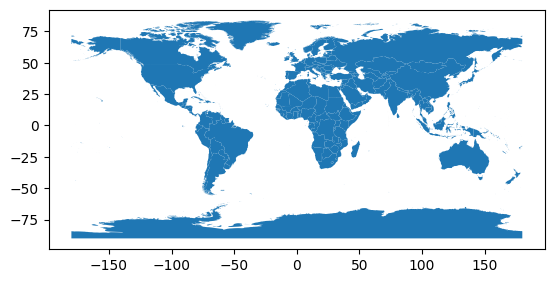

In [31]:
# Plot the whole world
theMapAndData.plot()

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

The size of all dots on the map must be the same to ensure a consistent visual comparison.

### Preprocessing: aggregating

This is a DOT UNIT proposal:

In [32]:
justDots=theMapAndData.copy()
dot_value = 100000
justDots['num_dots'] = (justDots['value'] / dot_value).astype(int)

### Preprocessing: distributing dots

And here, we get a location for the dots:

In [33]:
# 2. Generate the random dot locations using .sample_points()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [34]:
justDots

0    0      POINT (-70.0148 12.58153)
1    0     POINT (-61.79932 17.15221)
2    0      POINT (60.59609 33.11987)
     1      POINT (60.59639 33.73454)
     2      POINT (60.78012 33.01722)
                      ...            
223  11    POINT (126.21786 -8.75831)
     12     POINT (126.44689 -8.9005)
     13    POINT (126.45433 -8.49097)
     14    POINT (127.11367 -8.35339)
224  0      POINT (-69.0851 12.28335)
Name: sampled_points, Length: 87943, dtype: geometry

In [35]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

### Preprocessing: building GDF from GS

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [36]:
justDots.reset_index(drop=True, inplace=True)
World_dots=gpd.GeoDataFrame(geometry=justDots)
World_dots

,geometry
0,POINT (-70.0148 12.58153)
1,POINT (-61.79932 17.15221)
2,POINT (60.59609 33.11987)
3,POINT (60.59639 33.73454)
4,POINT (60.78012 33.01722)
...,...
87938,POINT (126.21786 -8.75831)
87939,POINT (126.44689 -8.9005)
87940,POINT (126.45433 -8.49097)
87941,POINT (127.11367 -8.35339)


Now you have a GDF:

In [37]:
World_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 87943 entries, 0 to 87942
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  87943 non-null  geometry
dtypes: geometry(1)
memory usage: 687.2 KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

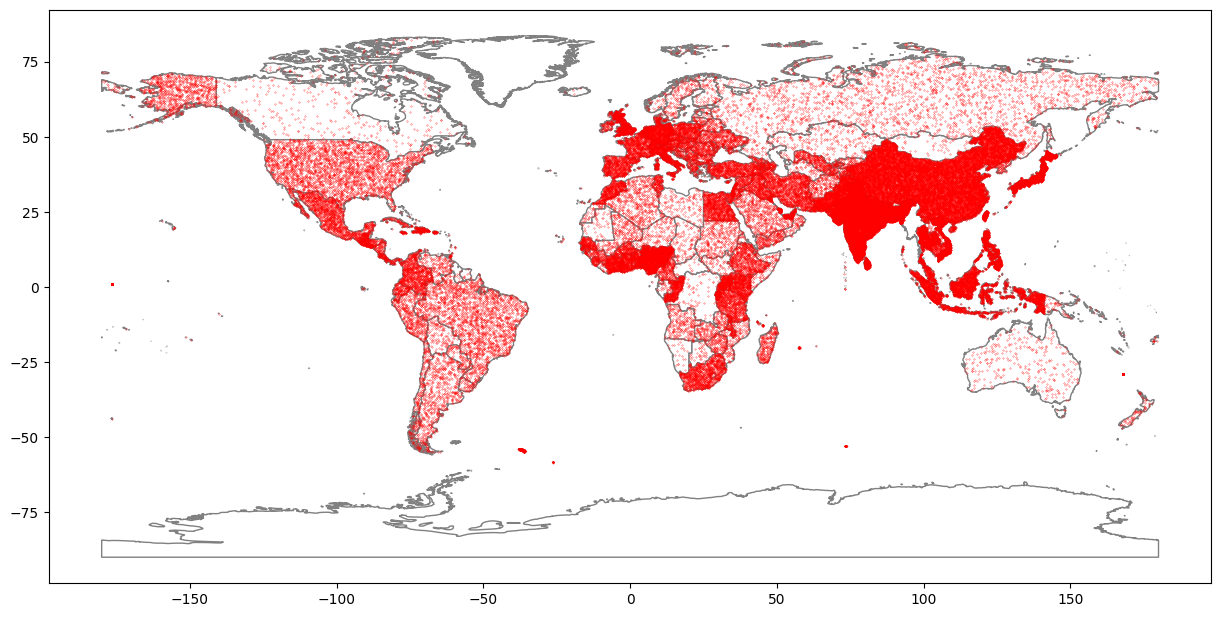

In [38]:
# Plot the base map of the world
base = theMapAndData.plot(facecolor="white", # color of polygon fill
               edgecolor='grey', # color of border
               figsize=(15, 10)) # Increased figure size for world map

# Plot the dots on top (using the justDots GeoSeries)
justDots.plot(markersize=0.05, color='red', ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

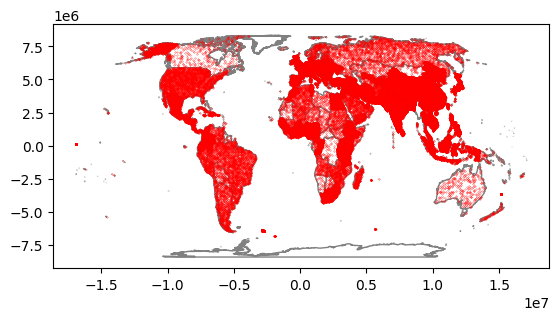

In [39]:
base=theMapAndData.to_crs(8857).plot(facecolor="white",
                              edgecolor='grey')
World_dots.to_crs(8857).plot(markersize=0.05, color='red',ax=base)

Let's keep the continent countries with that crs:

In [40]:
World_8857=theMapAndData.to_crs(8857)
World_dots_8857=World_dots.to_crs(8857)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: GDF of centroids

1. A location for a symbol, generally the polygon centroid.

In [41]:
World_8857_centroids = World_8857.copy()

# World_8857_centroids will have a new geometry:
World_8857_centroids['geometry'] = World_8857_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [42]:
World_8857_centroids['size'] = World_8857_centroids['value'].apply(lambda x: x**0.5/100)

## or
# import numpy as np
# Africa_8857_centroids['size'] = Africa_8857_centroids['population'].apply(lambda x: np.log10(x))

We got the basics, then:

<Axes: >

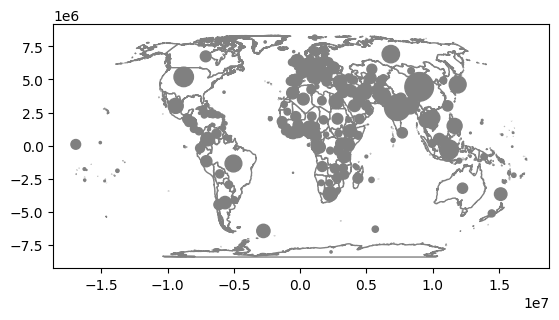

In [43]:
base=World_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
World_8857_centroids.plot(
    ax=base,
    markersize=World_8857_centroids['size'],
    color='grey'
)

Keep in mind that the standard way of computing centroids may bring some trouble. Let´s plot Seychelles:

In [44]:
!pip install mapclassify

In [45]:
base=World_8857[World_8857.Country=="Peru"].explore()
World_8857_centroids[World_8857_centroids.Country=="Peru"].explore(m=base,color="red")

A good alternative to centroids is representative_point() when dealing with complex multipolygons.

In [46]:
# replace the points
World_8857_centroids["geometry"]=World_8857.representative_point()

We will keep that last result.

In [47]:
base=World_8857[World_8857.Country=="Peru"].explore()
World_8857_centroids[World_8857_centroids.Country=="Peru"].explore(m=base,color="red")

### Preprocessing: Computing new columns

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

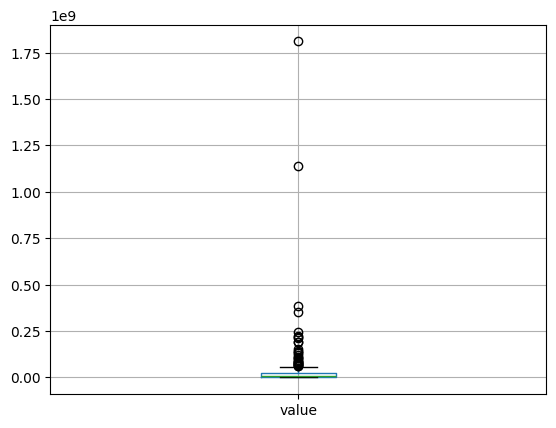

In [48]:
boxplotInfo=World_8857_centroids.boxplot(column='value',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [49]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([62700000, 191000000, 213000000, 1810000000, 87400000, 106000000,
       71400000, 77400000, 105000000, 1140000000, 151000000, 78500000,
       219000000, 66700000, 140000000, 65500000, 224000000, 189000000,
       135000000, 245000000, 108000000, 61200000, 83900000, 121000000,
       92200000, 70200000, 84300000, 386000000, 131000000, 352000000],
      dtype=object)

Then, these are the outlying countries:

In [50]:
World_8857_centroids[World_8857_centroids.value.isin(outliers)]

,Country,geometry,slug,value,date_of_information,ranking,region,size
10,Argentina,POINT (-5553772.712 -4493827.822),argentina,62700000,2023,29,South America,79.183332
21,Bangladesh,POINT (8263696.591 2996813.07),bangladesh,191000000,2023,9,South Asia,138.202750
29,Brazil,POINT (-4700709.502 -1764170.762),brazil,213000000,2023,8,South America,145.945195
40,China,POINT (8558589.424 4454406.546),china,1810000000,2023,1,East and Southeast Asia,425.440948
45,Colombia,POINT (-6936232.356 525486.665),colombia,87400000,2023,20,South America,93.487967
58,Egypt,POINT (2678759.188 3375702.424),egypt,106000000,2023,17,Africa,102.956301
64,Ethiopia,POINT (3713238.555 1171240.545),ethiopia,71400000,2022,25,Africa,84.498521
72,France,POINT (175396.764 5637422.087),france,77400000,2023,24,Europe,87.977270
81,Germany,POINT (820014.651 6093052.18),germany,105000000,2023,18,Europe,102.469508
94,India,POINT (7400087.029 2723625.672),india,1140000000,2022,2,South Asia,337.638860


Knowing this information, we can create a column as outlier flag:

In [51]:
World_8857_centroids['value_outlier']=World_8857_centroids.value.isin(outliers)*1

## see
World_8857_centroids

,Country,geometry,slug,value,date_of_information,ranking,region,size,value_outlier
0,Aruba,POINT (-6627435.863 1600262.217),aruba,141000,2021,188,Central America and the Caribbean,3.754997,0
1,Antigua and Barbuda,POINT (-5794568.997 2176408.939),antigua-and-barbuda,184000,2021,183,Central America and the Caribbean,4.289522,0
2,Afghanistan,POINT (5737749.881 4223784.83),afghanistan,23000000,2023,59,South Asia,47.958315,0
3,Algeria,POINT (58149.408 3504624.452),algeria,51500000,2023,35,Africa,71.763500,0
4,Azerbaijan,POINT (4052504.835 4936297.741),azerbaijan,11000000,2023,91,Central Asia,33.166248,0
...,...,...,...,...,...,...,...,...,...
220,Zimbabwe,POINT (2738721.618 -2417820.45),zimbabwe,15000000,2023,72,Africa,38.729833,0
221,South Sudan,POINT (2780382.012 1002979.353),south-sudan,6170000,2023,118,Africa,24.839485,0
222,Indonesia,POINT (10855969.809 11510.466),indonesia,352000000,2023,4,East and Southeast Asia,187.616630,1
223,Timor-Leste,POINT (11979482.349 -1139940.313),timor-leste,1560000,2023,158,East and Southeast Asia,12.489996,0


We can use that like this:

<Axes: >

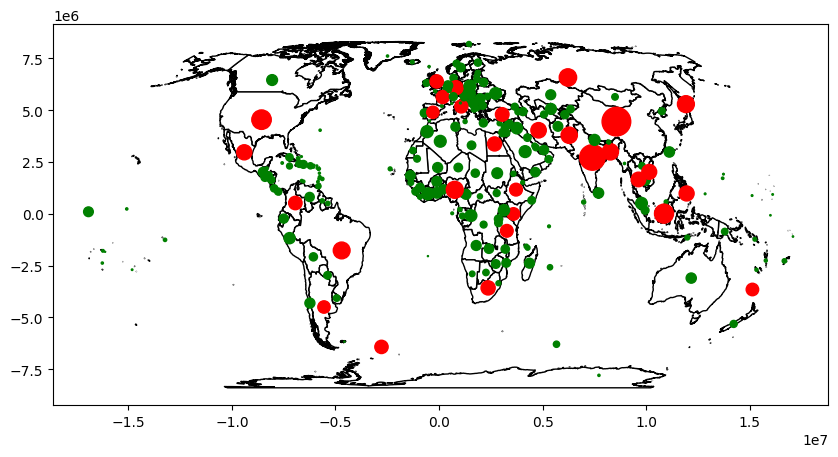

In [52]:
base = World_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'red', 0: 'green'}

# Plot the centroids on top
World_8857_centroids.plot(
    ax=base,
    markersize=World_8857_centroids['size'],
    color=World_8857_centroids['value_outlier'].map(mapcolor)
)

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [53]:
# Create explicit copies of the DataFrames
World_8857_centroids_out = World_8857_centroids[World_8857_centroids.value_outlier==1].copy()
World_8857_centroids_no_out = World_8857_centroids[World_8857_centroids.value_outlier==0].copy()


2. Compute sizes in each:

In [54]:
World_8857_centroids_out['size'] = World_8857_centroids_out['value'].apply(lambda x: x**0.5 / 50)
World_8857_centroids_no_out['size'] = World_8857_centroids_no_out['value'].apply(lambda x: x**0.5 / 50)

Now, plot the three layers, using some color gradient for the non-outliers:

<Axes: >

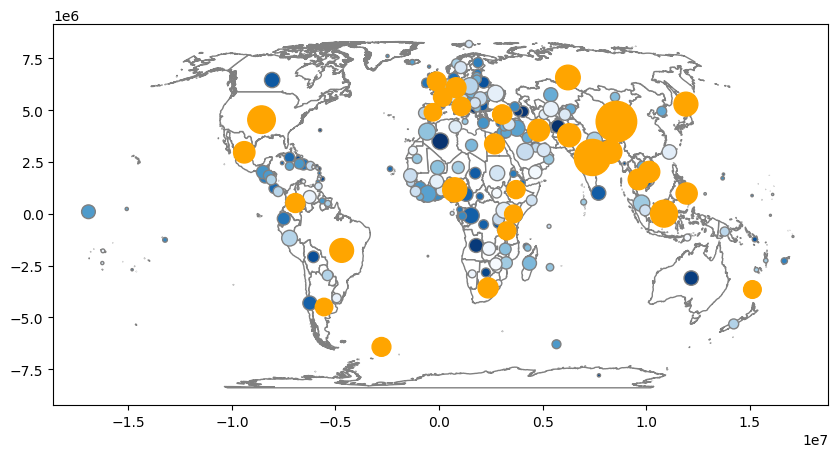

In [55]:
base=World_8857.plot(color='white', edgecolor='grey',figsize=(10,10))

World_8857_centroids_no_out.plot(
    ax=base,
    markersize=World_8857_centroids_no_out['size'],
    edgecolor='grey',
    c=World_8857_centroids_no_out['size'],
    cmap='Blues_r'
)
World_8857_centroids_out.plot(
    ax=base,
    markersize=World_8857_centroids_out['size'],
    color='orange'
)

# Thematics: Choropleths

Notice that the DDMs may use aggregated counts, and the PSMs use the variables in its original form. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


<Axes: >

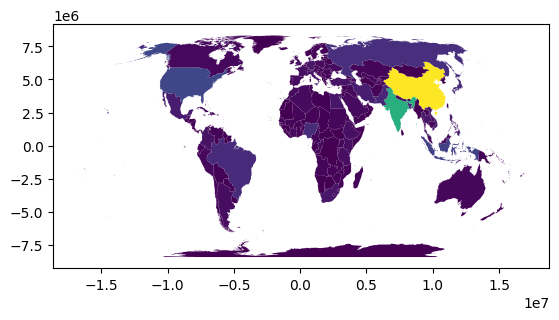

In [56]:
World_8857.plot(World_8857.value)

In [57]:
World_8857

,Country,geometry,slug,value,date_of_information,ranking,region
0,Aruba,"MULTIPOLYGON (((-6620482.396 1588412.71, -6626...",aruba,141000,2021,188,Central America and the Caribbean
1,Antigua and Barbuda,"MULTIPOLYGON (((-5783849.886 2235995.185, -578...",antigua-and-barbuda,184000,2021,183,Central America and the Caribbean
2,Afghanistan,"MULTIPOLYGON (((5342295.88 4422474.235, 534340...",afghanistan,23000000,2023,59,South Asia
3,Algeria,"MULTIPOLYGON (((-461528.863 3785845.186, -4603...",algeria,51500000,2023,35,Africa
4,Azerbaijan,"MULTIPOLYGON (((3982117.977 4794985.739, 39763...",azerbaijan,11000000,2023,91,Central Asia
...,...,...,...,...,...,...,...
220,Zimbabwe,"MULTIPOLYGON (((3010756.809 -2710383.71, 30087...",zimbabwe,15000000,2023,72,Africa
221,South Sudan,"MULTIPOLYGON (((3254641.759 1277089.044, 32538...",south-sudan,6170000,2023,118,Africa
222,Indonesia,"MULTIPOLYGON (((11704991.792 -1384711.69, 1170...",indonesia,352000000,2023,4,East and Southeast Asia
223,Timor-Leste,"MULTIPOLYGON (((11844980.582 -1192317.932, 118...",timor-leste,1560000,2023,158,East and Southeast Asia


In [58]:
World_8857.plot(World_8857.value/World_8857.sq_km)

AttributeError: 'GeoDataFrame' object has no attribute 'sq_km'

Choropleths are great to represent normalized indicators such as:
* Densities
* Ratios
* Rates
* Averages

Population by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be
that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.

### Preprocessing: Discretizing

Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [59]:
## do you have these installed?
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.12/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: mapclassify
Version: 2.10.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:


We will discretize this:

In [60]:
World_8857['valuepopulation_density']=World_8857.value/World_8857.sq_km

AttributeError: 'GeoDataFrame' object has no attribute 'sq_km'

Let's explore the bining algorithms:

In [61]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=World_8857['value_density']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

KeyError: 'value_density'

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
World_8857['value_density_FJ5'] = fj5.yb

In [ ]:
# there you are
World_8857[['value_density','population_density_FJ5']].head(20)

We could create a copy of the bins to add labels:

In [ ]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

Africa_8857['population_density_FJ5_cat']=Africa_8857.loc[:,'population_density_FJ5'].replace(newLabelsForLevels)

# we have
Africa_8857[['population_density','population_density_FJ5','population_density_FJ5_cat']].head(20)

We are ready for a discrete choropleth:

NameError: name 'Africa_8857' is not defined

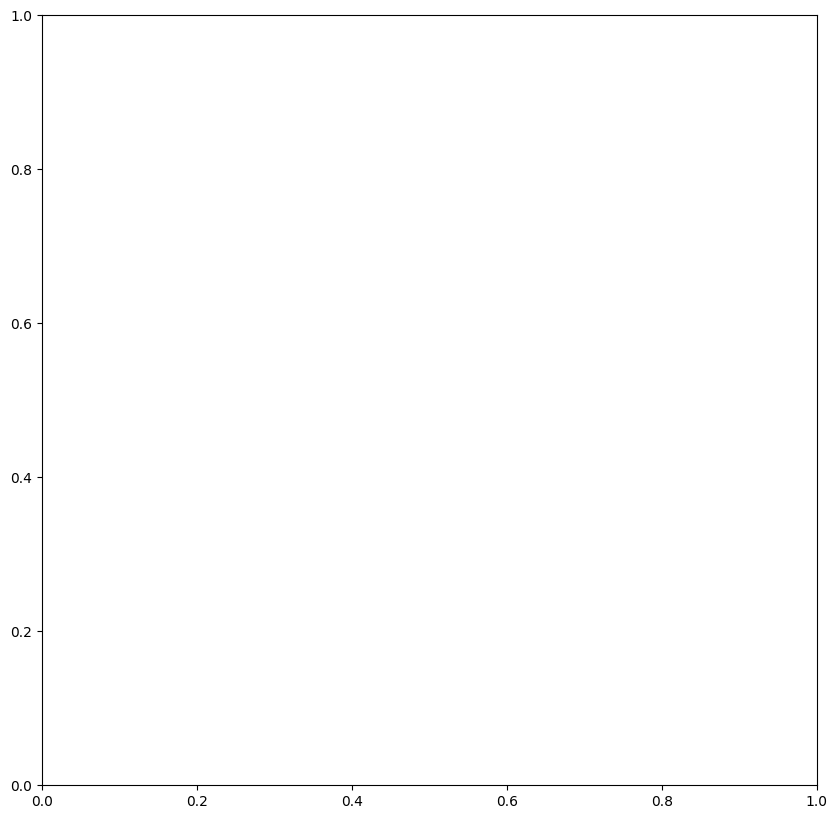

In [64]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
Africa_8857.plot(column='population_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save this maps for R.

In [62]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
_
countries
_3
theMapAndData
World_dots
_36
World_8857
World_dots_8857
World_8857_centroids
_50
_51
World_8857_centroids_out
World_8857_centroids_no_out
_57


These are the ones needed in R:

In [63]:
# for choropleth and base map
World_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              225 non-null    object  
 1   geometry             225 non-null    geometry
 2   slug                 225 non-null    object  
 3   value                225 non-null    int64   
 4   date_of_information  225 non-null    int64   
 5   ranking              225 non-null    int64   
 6   region               225 non-null    object  
dtypes: geometry(1), int64(3), object(3)
memory usage: 12.4+ KB


In [65]:
# for DDMs
World_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 87943 entries, 0 to 87942
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  87943 non-null  geometry
dtypes: geometry(1)
memory usage: 687.2 KB


In [66]:
# for PSMs
World_8857_centroids.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              225 non-null    object  
 1   geometry             225 non-null    geometry
 2   slug                 225 non-null    object  
 3   value                225 non-null    int64   
 4   date_of_information  225 non-null    int64   
 5   ranking              225 non-null    int64   
 6   region               225 non-null    object  
 7   size                 225 non-null    float64 
 8   value_outlier        225 non-null    int64   
dtypes: float64(1), geometry(1), int64(4), object(3)
memory usage: 15.9+ KB


In [67]:
# for PSMs
World_8857_centroids_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 30 entries, 10 to 222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              30 non-null     object  
 1   geometry             30 non-null     geometry
 2   slug                 30 non-null     object  
 3   value                30 non-null     int64   
 4   date_of_information  30 non-null     int64   
 5   ranking              30 non-null     int64   
 6   region               30 non-null     object  
 7   size                 30 non-null     float64 
 8   value_outlier        30 non-null     int64   
dtypes: float64(1), geometry(1), int64(4), object(3)
memory usage: 2.3+ KB


In [68]:
# for PSMs
World_8857_centroids_no_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 195 entries, 0 to 224
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              195 non-null    object  
 1   geometry             195 non-null    geometry
 2   slug                 195 non-null    object  
 3   value                195 non-null    int64   
 4   date_of_information  195 non-null    int64   
 5   ranking              195 non-null    int64   
 6   region               195 non-null    object  
 7   size                 195 non-null    float64 
 8   value_outlier        195 non-null    int64   
dtypes: float64(1), geometry(1), int64(4), object(3)
memory usage: 15.2+ KB


The file **africa_8857.gpkg** will keep all those maps as layers!

In [69]:
World_8857.to_file("World_8857.gpkg",driver='GPKG',layer='continent')
World_dots_8857.to_file("World_8857.gpkg",driver='GPKG',layer='value_ddm')
World_8857_centroids.to_file("World_8857.gpkg",driver='GPKG',layer='value_psm')
World_8857_centroids_out.to_file("World_8857.gpkg",driver='GPKG',layer='outlier_value_psm')
World_8857_centroids_no_out.to_file("World_8857.gpkg",driver='GPKG',layer='no_outlier_value_psm')